In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bizPATH = 'data/yelp_dataset/yelp_academic_dataset_business.json'
revPATH = 'data/yelp_dataset/yelp_academic_dataset_review.json'

In [34]:
infile = open(bizPATH)
data = json.loads(infile.readline())

True

'{"business_id":"f9NumwFMBDn751xgFiRbNA","name":"The Range At Lake Norman","address":"10913 Bailey Rd","city":"Cornelius","state":"NC","postal_code":"28031","latitude":35.4627242,"longitude":-80.8526119,"stars":3.5,"review_count":36,"is_open":1,"attributes":{"BusinessAcceptsCreditCards":"True","BikeParking":"True","GoodForKids":"False","BusinessParking":"{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}","ByAppointmentOnly":"False","RestaurantsPriceRange2":"3"},"categories":"Active Life, Gun\\/Rifle Ranges, Guns & Ammo, Shopping","hours":{"Monday":"10:0-18:0","Tuesday":"11:0-20:0","Wednesday":"10:0-18:0","Thursday":"11:0-20:0","Friday":"11:0-20:0","Saturday":"11:0-20:0","Sunday":"13:0-18:0"}}\n'

In [35]:
# first extracting all the biz id within 'bar' category and save it into a dict
# because dict is implemented in hashtable with mostly O(1) look up time

def bizCatFilter(path, cat = 'bar'):

    bizID = {}

    with open(path, 'r') as infile:
        for line in infile:
            data = json.loads(line)
            if data['categories']:
                if cat.lower() in data['categories'].lower():
#                     if data['review_counts'] >=5
                    bizID[data['business_id']] = data['review_count']
    return bizID

In [36]:
bizID = bizCatFilter(bizPATH, 'bar')

In [102]:
sum([x >= 10 for x in list(bizID.values())])

15344

In [74]:
# def readBiz(path):
    
#     biz = list()
#     with open(path, 'r') as infile:
# #         for i, line in enumerate(infile):
#     #         if i%(stop)==0:
#     #             print(i)
#     #         if i == stop:
#     #             break
#         for line in infile:
#             try:
#                 data = json.loads(line)
#             except Exception as e:
#                 print(e)

            
#             if(data['business_id'] in bizID):

#                 review_id = data['review_id']
#                 user_id = data['user_id']
#                 business_id = data['business_id']
#                 stars = data['stars']
#                 date = data['date']
#                 text = data['text']
#                 useful = data['useful']
#                 funny = data['funny']
#                 cool = data['cool']

#                 reviews.append([review_id, user_id, business_id, stars, date, text, useful, funny, cool])


#     df = pd.DataFrame(reviews, columns = ['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool'])
#     df.date = pd.to_datetime(df.date)    

<AxesSubplot:>

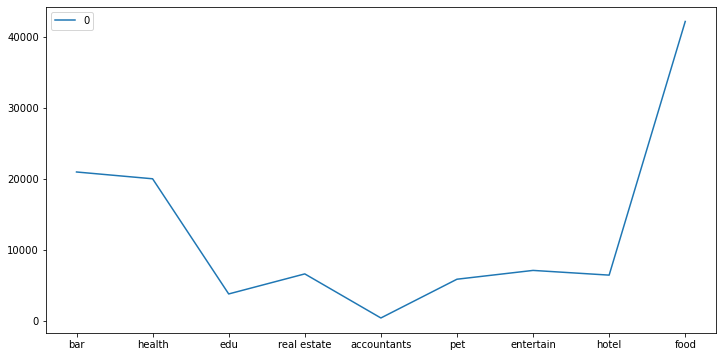

In [101]:
cat_list = ['bar', 'health', 'edu', 'real estate', 'accountants', 'pet', 'entertain', 'hotel', 'food']

cat_counts = list()

for c in cat_list:
    cat_counts.append(len(bizCatFilter(bizPATH, c)))
    
df = pd.DataFrame(cat_counts, index = cat_list)
df.plot(figsize=(12,6))

In [102]:
bizID = bizCatFilter(bizPATH, 'bar')

In [117]:
list(bizID.keys())[0] in bizID

True

In [114]:
list(bizID.keys())[0]

'DCsS3SgVFO56F6wRO_ewgA'

In [75]:
path = revPATH
# stop = 100000

reviews = list()
with open(path, 'r') as infile:
    for i, line in enumerate(infile):
#         if i%(stop)==0:
#             print(i)
#         if i == stop:
#             break
            
        data = json.loads(line)
        
        if(data['business_id'] in bizID):
            
            review_id = data['review_id']
            user_id = data['user_id']
            business_id = data['business_id']
            stars = data['stars']
            date = data['date']
            text = data['text']
            useful = data['useful']
            funny = data['funny']
            cool = data['cool']
            
            reviews.append([review_id, user_id, business_id, stars, date, text, useful, funny, cool])
            

df = pd.DataFrame(reviews, columns = ['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool'])
df.date = pd.to_datetime(df.date)            

In [76]:
print(f'bizID: {len(bizID)}')
print(f'userID: {df.user_id.nunique()}')
print(f'reviews: {df.shape[0]}')


bizID: 20946
userID: 818072
reviews: 2021447


In [132]:
df.describe()

,stars,useful,funny,cool
count,2.021447e+06,2.021447e+06,2.021447e+06,2.021447e+06
mean,3.779197e+00,1.127222e+00,4.542553e-01,5.991282e-01
std,1.378417e+00,3.050826e+00,1.881907e+00,2.453796e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,2.570000e+02,2.910000e+02,2.030000e+02


<AxesSubplot:>

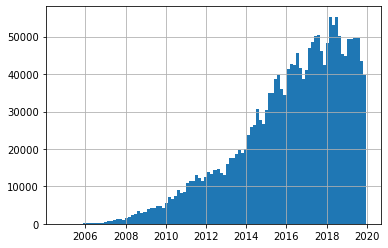

In [140]:
df.date.hist(bins = 100)

<AxesSubplot:>

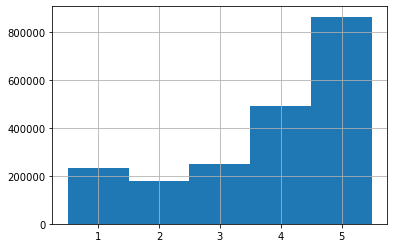

In [137]:
df.stars.hist(range=(0.5, 5.5), bins =5)

<AxesSubplot:>

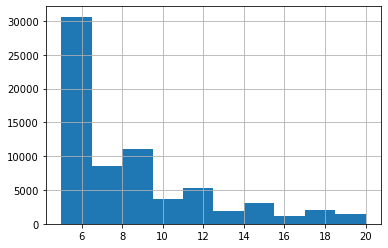

In [158]:
df.user_id.value_counts().hist(range=[5,20],bins = 10)

In [168]:
(df.user_id.value_counts() > 5).sum()

59449

In [188]:
(df[df.date > '2016'].user_id.value_counts() >= 10).sum()

13811

In [179]:
(df[df.date > '2017'].user_id.value_counts() >= 5).sum()

30697

In [187]:
(df.date >= '2019-12-10').sum()

2329

In [164]:
df.date

0         2015-12-05 03:18:11
1         2018-03-04 01:03:53
2         2009-10-13 09:50:48
3         2016-04-11 16:42:13
4         2017-01-02 05:24:56
                  ...        
2021442   2019-12-10 07:43:02
2021443   2015-05-06 00:05:18
2021444   2019-12-06 08:47:32
2021445   2019-06-06 15:01:53
2021446   2019-12-07 00:29:55
Name: date, Length: 2021447, dtype: datetime64[ns]

In [78]:
df.shape

(2021447, 9)

In [80]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [81]:
r_df = df.drop(columns=['review_id', 'text', 'useful', 'funny', 'cool'])

In [85]:
r_df.shape

(2021447, 4)

In [86]:
r_df = r_df[r_df['date'] > '2016']

In [87]:
r_df.shape

(1215713, 4)

In [100]:
### One-liner
r_df_count = r_df.groupby('user_id').filter(lambda x : len(x) >= 10)

In [101]:
r_df_count.user_id.value_counts()

bLbSNkLggFnqwNNzzq-Ijw    314
JaqcCU3nxReTW2cBLHounA    288
ELcQDlf69kb-ihJfxZyL0A    286
6Ki3bAL0wx9ymbdJqbSWMA    278
U4INQZOPSUaj8hMjLlZ3KA    255
                         ... 
Br9bkJqjKms9BjvKWZsgwA     10
TzAYNpymmXokjehm2TK3bA     10
WZRv5LBXPeXPlx3_KegiEw     10
bWxeDLTenYE3PvBu6PZavg     10
Qju9j2Aby_j-MdspmASxTg     10
Name: user_id, Length: 13811, dtype: int64

In [ ]:
r_df.groupby('user_id')

In [93]:
r_df.user_id == r_df.user_id.value_counts()[r_df.user_id.value_counts() >= 10].index

ValueError: ('Lengths must match to compare', (1215713,), (13811,))